In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2

In [3]:
df=pd.read_csv('Modelbased.csv',encoding = "ISO-8859-1")
print(df.head())

   Year  Month         Make              Model  Quantity   Pct
0  2007      1  Volkswagen   Volkswagen Passat      1267  10.0
1  2007      1      Toyota         Toyota Rav4       819   6.5
2  2007      1      Toyota      Toyota Avensis       787   6.2
3  2007      1  Volkswagen     Volkswagen Golf       720   5.7
4  2007      1      Toyota      Toyota Corolla       691   5.4


In [4]:
df=pd.read_csv('Modelbased.csv',encoding = "ISO-8859-1")
#Models=df.filter(items=['Model']).drop_duplicates()
#Models.index=pd.Series([i for i in range(Models.shape[0])])
df = df.set_index('Model')
D=df.groupby(df.index).count()
D=D.sort_values(['Year'],ascending=False)
D=D.iloc[0:30]
Models=D.index
Models.index=pd.Series([i for i in range(30)])
Models

Index(['Volkswagen Passat', 'Volkswagen Golf', 'Skoda Octavia', 'Toyota Auris',
       'Toyota Yaris', 'Volvo V70', 'Nissan Qashqai', 'Ford Focus',
       'Toyota Avensis', 'Toyota Rav4', 'Ford Mondeo', 'Volkswagen Tiguan',
       'Mitsubishi Outlander', 'Audi A4', 'Audi A3', 'Nissan Leaf',
       'Volkswagen Polo', 'Volvo XC60', 'Mazda CX-5', 'Toyota Prius',
       'BMW 3-serie', 'Volvo V50', 'Honda CR-V', 'Peugeot 308', 'Volvo V60',
       'Opel Astra', 'Tesla Model S', 'Volkswagen up!', 'Volvo V40',
       'Peugeot 207'],
      dtype='object', name='Model')

In [5]:
def extractor(i,df,Models):
    Vehicule=pd.DataFrame(df[['Year','Month','Quantity','Pct']].loc[Models[i]])
    Vehicule['Date']=pd.to_datetime( (Vehicule.Year*100+Vehicule.Month*1).apply(str),format="%Y%m")
    Vehicule=Vehicule.set_index('Date')
    Vehicule.index=Vehicule.index.to_period('M').to_timestamp('M')
    Vehicule['Date']=Vehicule.index
    Vevo=Vehicule['Quantity']
    return Vehicule,Vevo

C=[]
D=[]
for i in range(Models.shape[0]):
        A,B=extractor(i,df,Models)
        C+=[B]
        D+=[A]

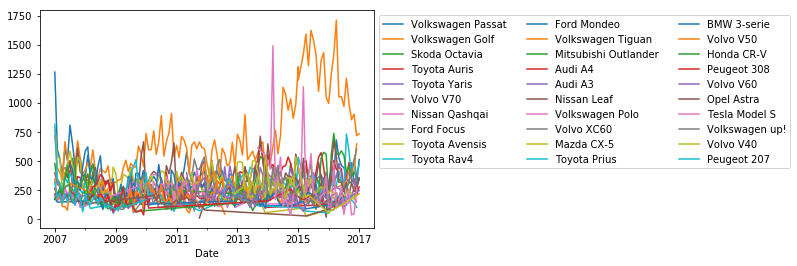

In [6]:
for i in range(Models.shape[0]):
    plt.figure(0)
    ax=C[i].plot()
ax.legend(Models,bbox_to_anchor=(1,1),ncol=3)
plt.show()

# VolksWagen Passat Sales Forcast Using Basic RNN 

0 Volkswagen Passat


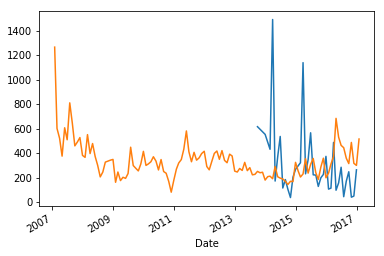

1 Volkswagen Golf


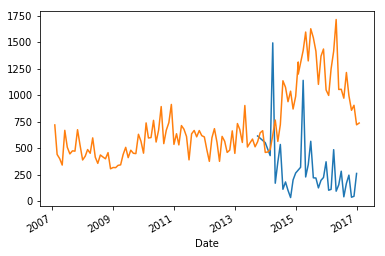

2 Skoda Octavia


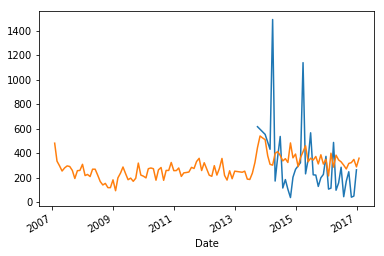

3 Toyota Auris


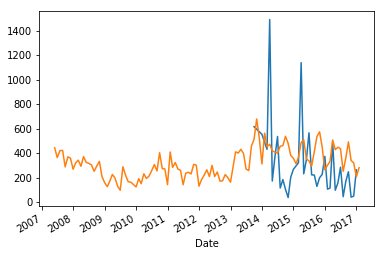

4 Toyota Yaris


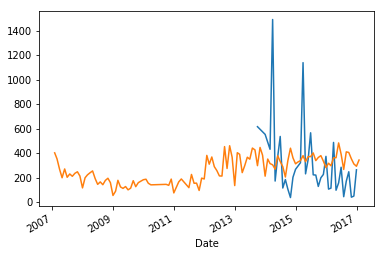

5 Volvo V70


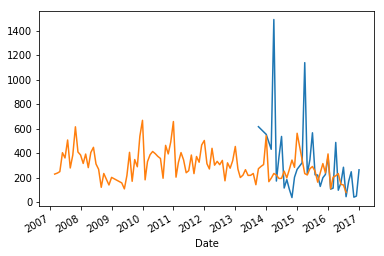

6 Nissan Qashqai


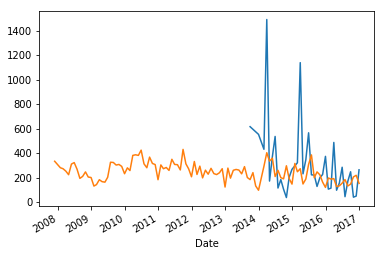

7 Ford Focus


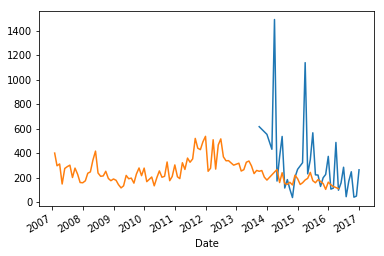

8 Toyota Avensis


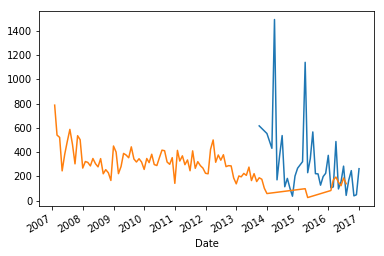

9 Toyota Rav4


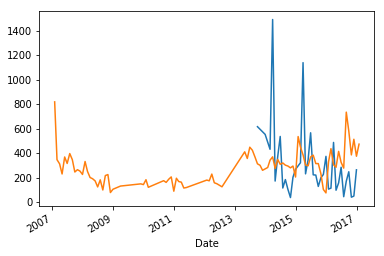

10 Ford Mondeo


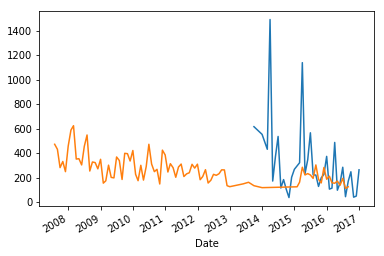

11 Volkswagen Tiguan


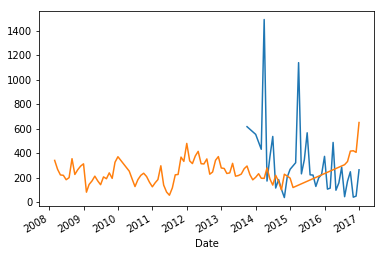

12 Mitsubishi Outlander


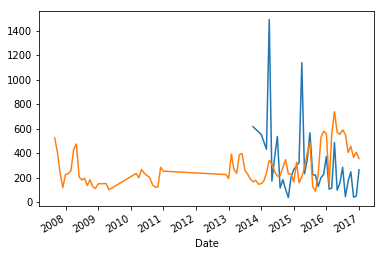

13 Audi A4


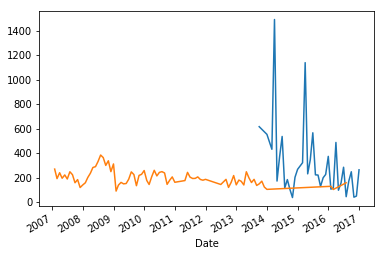

14 Audi A3


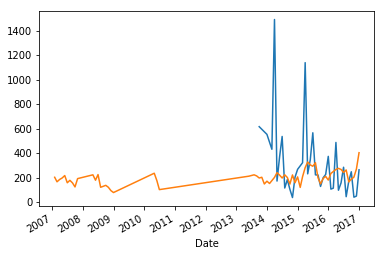

15 Nissan Leaf


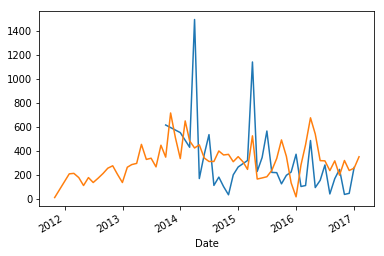

16 Volkswagen Polo


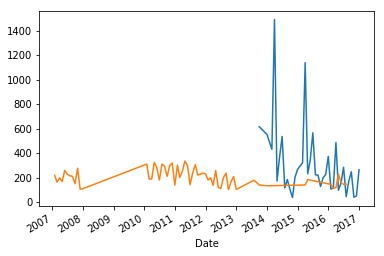

17 Volvo XC60


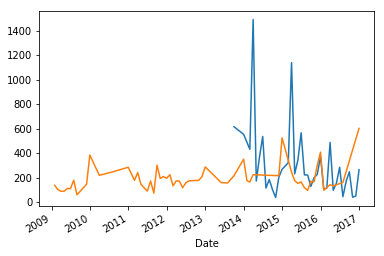

18 Mazda CX-5


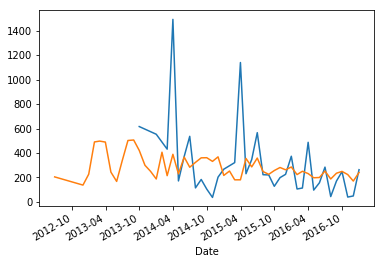

19 Toyota Prius


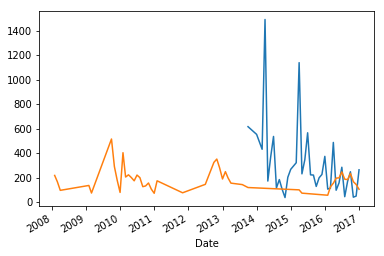

20 BMW 3-serie


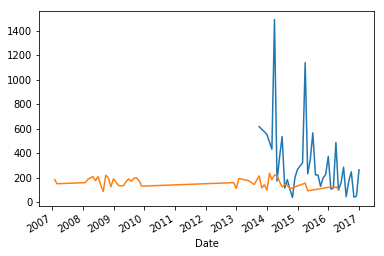

21 Volvo V50


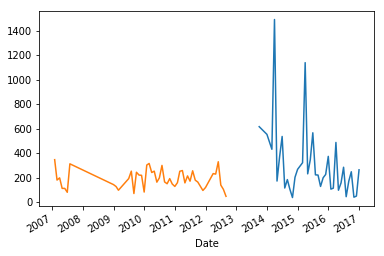

22 Honda CR-V


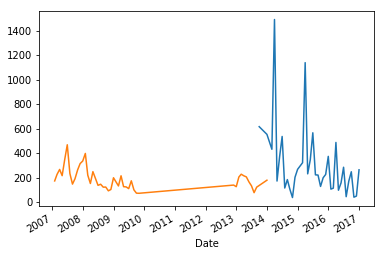

23 Peugeot 308


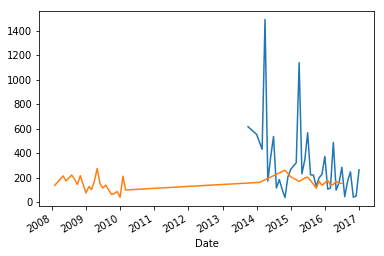

24 Volvo V60


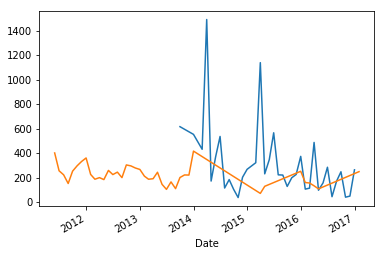

25 Opel Astra


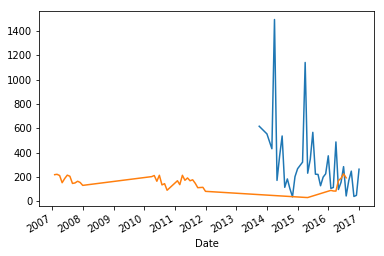

26 Tesla Model S


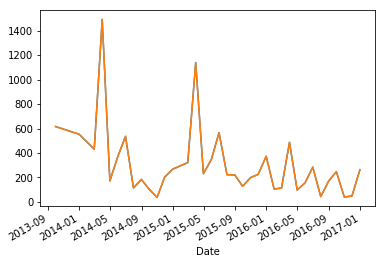

27 Volkswagen up!


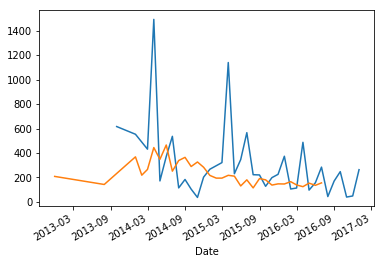

28 Volvo V40


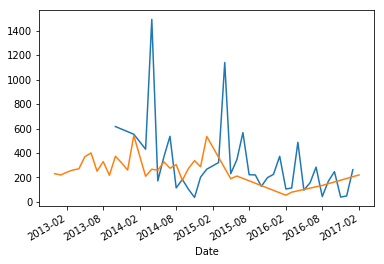

29 Peugeot 207


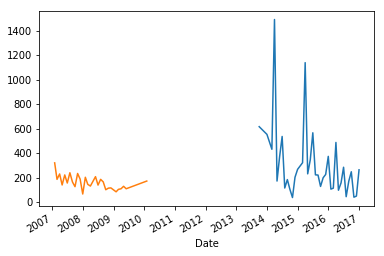

In [7]:
for a in range(30):
    print(a,Models[a])
    Tesla_S=D[26]
    BMW3=D[a]
    C[26].plot()
    C[a].plot()
    plt.show()

In [8]:
TeslaS=D[26]
print(TeslaS.head())
TeslaS['Shifted']=TeslaS ['Quantity'].shift(4)
TeslaS.fillna(0,inplace=True)
print(TeslaS.head())

            Year  Month  Quantity   Pct       Date
Date                                              
2013-09-30  2013      9       616   5.1 2013-09-30
2013-12-31  2013     12       553   4.9 2013-12-31
2014-02-28  2014      2       431   3.8 2014-02-28
2014-03-31  2014      3      1493  10.8 2014-03-31
2014-04-30  2014      4       171   1.4 2014-04-30
            Year  Month  Quantity   Pct       Date  Shifted
Date                                                       
2013-09-30  2013      9       616   5.1 2013-09-30      0.0
2013-12-31  2013     12       553   4.9 2013-12-31      0.0
2014-02-28  2014      2       431   3.8 2014-02-28      0.0
2014-03-31  2014      3      1493  10.8 2014-03-31      0.0
2014-04-30  2014      4       171   1.4 2014-04-30    616.0


## Predicting The last 4 months

(4, 8, 1) (4, 8, 1) (1, 8, 1) (1, 8, 1)


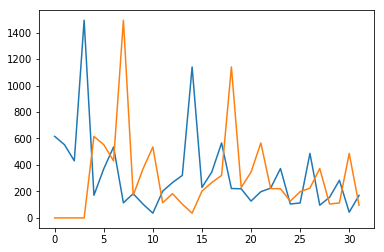

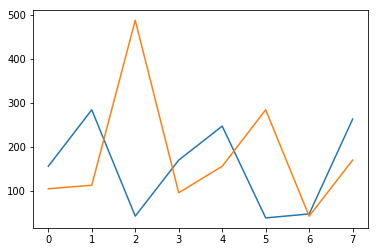

In [10]:

n_steps = 8
n_inputs = 1
n_neurons = 120
n_outputs = 1
learning_rate = 0.01
n_layers = 1
kp = 0.2
nn_units=120

XTS=np.array(TeslaS['Quantity'][:-4]).reshape(-1,n_steps,n_inputs)
yTS=np.array(TeslaS['Shifted'][:-4]).reshape(-1,n_steps,n_inputs)
X_test=np.array(TeslaS['Quantity'][-8:]).reshape(-1,8,n_inputs)
y_test=np.array(TeslaS['Shifted'][-8:]).reshape(-1,8,n_inputs)
print(XTS.shape,yTS.shape,X_test.shape,y_test.shape)

plt.plot(XTS.reshape(-1))
plt.plot(yTS.reshape(-1))
plt.show()
plt.plot(X_test.reshape(-1))
plt.plot(y_test.reshape(-1))
plt.show()

In [ ]:
#O=np.c_[XVP,yVP]
#N=pd.DataFrame({'X':XVP,'y':yVP})
#N.to_csv('TTSS.csv') 

In [40]:
n_steps = 8
n_inputs = 1
n_neurons = 120
n_outputs = 1
learning_rate = 0.01
n_layers = 1
kp = 0.2
nn_units=120
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
keep=tf.placeholder(tf.float32,shape=(None))

#cell = tf.contrib.rnn.OutputProjectionWrapper(
#    tf.contrib.rnn.BasicRNNCell(
#                                num_units=n_neurons, activation=tf.nn.relu
#                                ),
#                    output_size=n_outputs)

#outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

#basic_cells =[tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.GRUCell(num_units=n_neurons),input_keep_prob=kp) for _ in range(n_layers)]
#multi_layer_cell = tf.contrib.rnn.MultiRNNCell(basic_cells)
def lstm_cell():
    #lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size, reuse=tf.get_variable_scope().reuse)
    lstm=tf.contrib.rnn.BasicRNNCell(num_units=nn_units,reuse=tf.get_variable_scope().reuse)
    return tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=kp)
#cell = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(n_layers)])
cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu)
#cell=tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.contrib.layers.fully_connected(stacked_rnn_outputs, n_outputs,activation_fn=None)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

n_iterations = 10000
epoch=100
BB=np.zeros((4,n_steps,n_inputs))
BB[0,:,:]=XTS[-1,:,:]
II=X_test.reshape(-1)
III=y_test.reshape(-1)
saver=tf.train.Saver()
with tf.Session() as sess:
    init.run()
    for i in range(epoch):
        for l in range (9):
            _,mse,outo=sess.run([training_op,loss,outputs], feed_dict={X: XTS, y: yTS,keep:0.5})
            acc=sess.run(outputs,feed_dict={X:X_test})
            acc=acc.reshape(-1)
            for i in range(3):
                temp=BB[i,:,:]
                temp=temp.reshape(-1,8,1)
                BB[i+1,:,:]=sess.run(outputs,feed_dict={X:temp,keep:1})
            seq=BB[:,-1,:]
            I=seq.reshape(-1)  
        #print(r2(I,II),r2(I,III))
        print(mse,r2(outo.reshape(-1,1),yTS.reshape(-1,1)),r2(III,acc))#,r2(y_new.reshape(-1,1),y_test.reshape(-1,1)))#,np.linalg.norm(y_.reshape(-1,1)-yVP.reshape(-1,1),2))
        if r2(III,acc)>0.65:
            saver.save(sess, "checkpoints/forcast_70_test_0.ckpt")
            break

161068.0 -101.03081467 -1.33952928386
72572.1 0.169673170722 -0.378927338348
58631.4 0.39928743877 -0.0959194558346
49630.8 0.457627706119 0.104667658628
42477.1 0.473590301318 0.24241224276
37355.8 0.573067358192 0.559033656645
30363.4 0.651330494451 0.745529518215


In [41]:
with tf.Session() as sess:
    saver.restore(sess,"checkpoints/forcast_70_test_0.ckpt" )
    AA=sess.run(outputs,feed_dict={X:X_test,keep:1}) 
    print(r2(AA.reshape(-1),y_test.reshape(-1)))

INFO:tensorflow:Restoring parameters from checkpoints/forcast_70_test_0.ckpt
0.672576213634


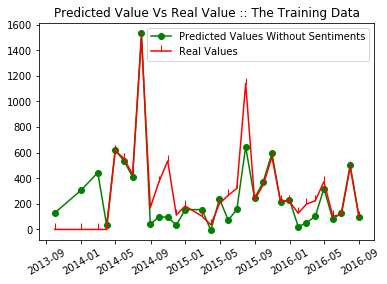

In [42]:
A=outo.reshape(-1)
B=yTS.reshape(-1)
plt.plot(TeslaS['Date'][:-4],A,label='Predicted Values Without Sentiments',color='g',marker='o')
plt.plot(TeslaS['Date'][:-4],B,label='Real Values',color='r',marker=2)
plt.legend(loc=1)
plt.title('Predicted Value Vs Real Value :: The Training Data')
plt.xticks(rotation=30) 
plt.savefig('ForcastEngineTrainwithoutsentiment.png')
plt.show()

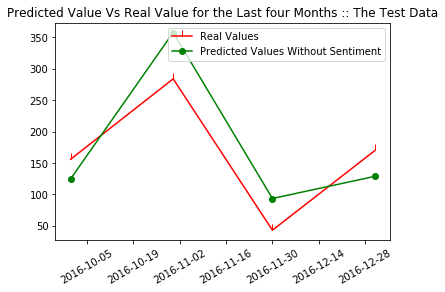

In [43]:
plt.plot(TeslaS['Date'][-4:],y_test.reshape(-1)[-4:],label='Real Values',color='r',marker=2)
plt.plot(TeslaS['Date'][-4:],AA.reshape(-1)[-4:],label='Predicted Values Without Sentiment',color='g',marker='o')
plt.title('Predicted Value Vs Real Value for the Last four Months :: The Test Data')
plt.xticks(rotation=30)
plt.legend(loc=1)
plt.savefig('ForcastEngineTestwithoutsentiment.png')
plt.show()

In [35]:
NN

array([[[   5.72459555],
        [  72.57191467],
        [ 199.31498718],
        [  54.97041321],
        [ 117.37481689],
        [ 352.36355591],
        [ 101.34406281],
        [ 153.67967224]]], dtype=float32)

In [36]:
y_test

array([[[ 105.],
        [ 113.],
        [ 487.],
        [  96.],
        [ 156.],
        [ 284.],
        [  43.],
        [ 170.]]])

In [191]:
BB[2,:,:]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

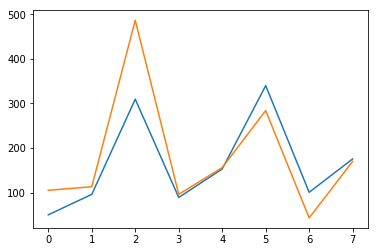

In [58]:
plt.plot(acc)
plt.plot(y_test.reshape(-1))
plt.show()